# Data Assessment & Analytics - Overlay Data
Notes:
- change os directory location
- be aware of the number of provdied native source data files

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd()
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\Washington\Overlays


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Washington/Overlays" # set working directory folder string here

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: WatershedAdministrativeUnits_ForestPracticesRegulation
dfin1 = pd.read_csv(InputFolderString + '/RawinputData/WatershedAdministrativeUnits_ForestPracticesRegulation.zip') # will need name of souce input files

# Data Set 2: Water_Resource_Inventory_Areas_(WRIA)
dfin2 = pd.read_csv(InputFolderString + '/RawinputData/Water_Resource_Inventory_Areas_(WRIA).zip') # will need name of souce input files

In [5]:
# WaDE Processed Input Data
#################################################################
dfd = pd.read_csv(InputFolderString + "/ProcessedInputData/date.csv").replace(np.nan, "")

dfo = pd.read_csv(InputFolderString + "/ProcessedInputData/organizations.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfru = pd.read_csv(InputFolderString + "/ProcessedInputData/reportingunits.csv").replace(np.nan, "")
dfrupurge = pd.read_csv(InputFolderString + "/ProcessedInputData/reportingunits_missing.csv").replace(np.nan, "")

dfov = pd.read_csv(InputFolderString + "/ProcessedInputData/overlays.csv").replace(np.nan, "")
dfovpurge = pd.read_csv(InputFolderString + "/ProcessedInputData/overlays_missing.csv").replace(np.nan, "")

dfovru = pd.read_csv(InputFolderString + "/ProcessedInputData/overlayreportingunits.csv").replace(np.nan, "")
dfovrupurge = pd.read_csv(InputFolderString + "/ProcessedInputData/overlayreportingunits_missing.csv").replace(np.nan, "")

# Reporting Unit Area Info
- reportingunits.csv

In [6]:
print(len(dfru))
dfru.head(1)

908


,ReportingUnitUUID,EPSGCodeCV,ReportingUnitName,ReportingUnitNativeID,ReportingUnitProductVersion,ReportingUnitTypeCV,ReportingUnitUpdateDate,StateCV,Geometry
0,WAov_RUwdnr1,4326,Chilliwack,wdnr1,,Watershed Administrative Units,1/7/2021,WA,POLYGON ((-121.23768728399995 49.0007234840000...


<Axes: >

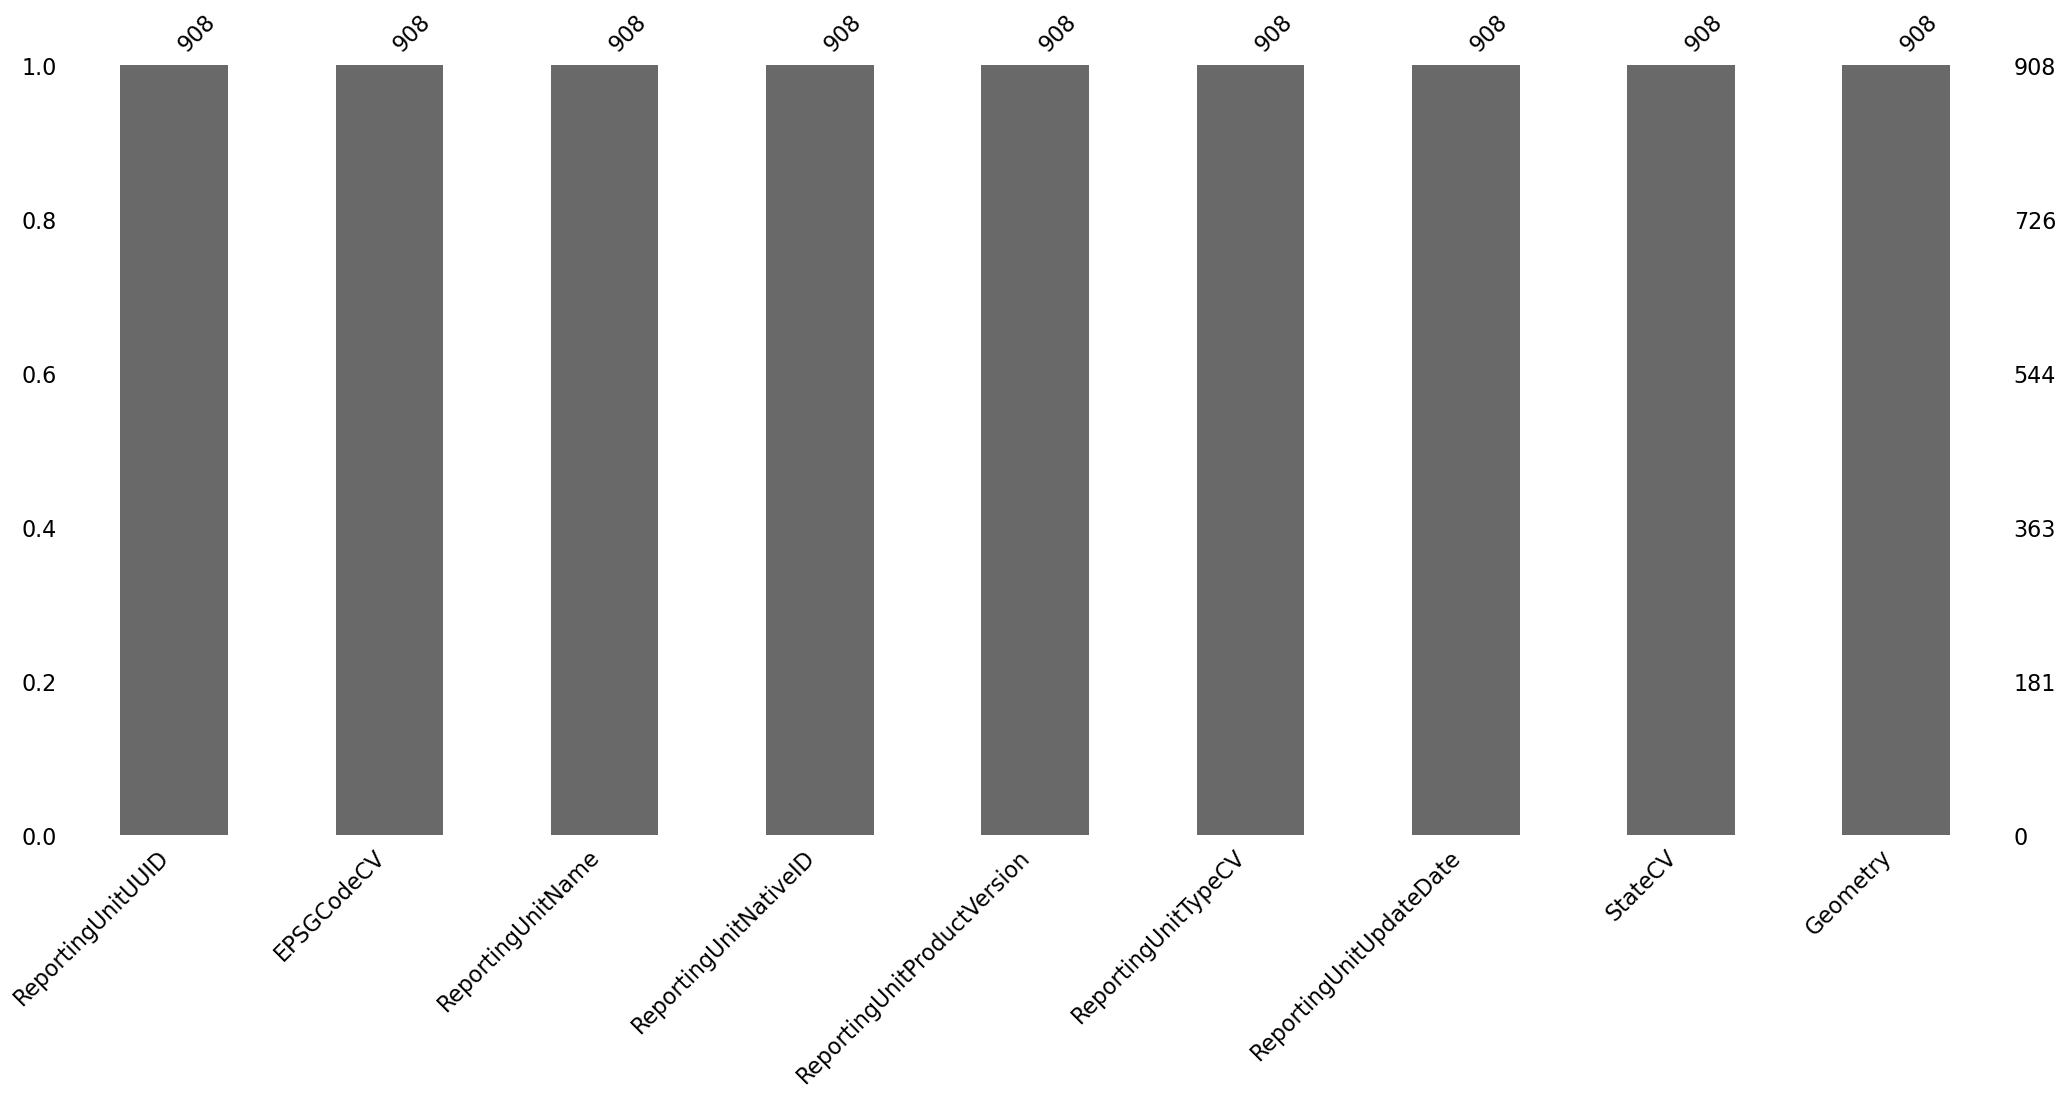

In [7]:
# Check what columns contain missing information.
#msno.matrix(dfru, figsize=(10,5), fontsize=10)
msno.bar(dfru)

In [8]:
# Unique values for 'ReportingUnitName'
for x in dfru['ReportingUnitName'].sort_values().unique():
    print(f'"' + x + '",')

"Abernathy",
"Acme",
"Adams",
"Adams Creek",
"Aeneas-Cape Labelle",
"Agency Creek",
"Aladdin",
"Alder",
"Alkali - Squilchuck",
"Alkali Canyon Agricultural Lands",
"Alps",
"Alta Lake",
"Anderson Creek",
"Anderson Island",
"Angry Mtn",
"Antoine Creek",
"Arctic Creek",
"Ashnola River",
"Bacon Creek",
"Bainbridge Island",
"Bangor-Port Gamble",
"Barnaby Creek",
"Bear Creek",
"Bear River",
"Beaver Creek",
"Beaver Creek/Lightning Creek",
"Beckler River",
"Bell Creek",
"Bellingham Bay",
"Benson Creek",
"Berry Creek",
"Big Beaver Creek",
"Big Bend Agricultural Lands",
"Big Creek",
"Big Creek/Grade Creek",
"Big Goose Lake",
"Big Lava Beds",
"Big Quil",
"Big Sheep Creek",
"Birch Bay",
"Bird Creek",
"Black River",
"Blakely Island",
"Blanchard Creek",
"Blewett",
"Blockhouse Creek",
"Blue Creek",
"Blue Lake Creek",
"Bogachiel",
"Boulder Creek",
"Bracken Creek",
"Bremer",
"Bridge Creek",
"Brody",
"Brooks",
"Buck Creek",
"Buffalo Lake",
"Bull Creek",
"Bumping",
"Bunker Creek",
"Burley Mtn",
"Butler Cr

In [9]:
# Unique values for 'ReportingUnitNativeID'
for x in dfru['ReportingUnitNativeID'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"wdnr1",
"wdnr10",
"wdnr100",
"wdnr101",
"wdnr102",
"wdnr103",
"wdnr104",
"wdnr105",
"wdnr106",
"wdnr107",
"wdnr108",
"wdnr109",
"wdnr11",
"wdnr110",
"wdnr111",
"wdnr112",
"wdnr113",
"wdnr114",
"wdnr115",
"wdnr116",
"wdnr117",
"wdnr118",
"wdnr119",
"wdnr12",
"wdnr120",
"wdnr121",
"wdnr122",
"wdnr123",
"wdnr124",
"wdnr125",
"wdnr126",
"wdnr127",
"wdnr128",
"wdnr129",
"wdnr13",
"wdnr130",
"wdnr131",
"wdnr132",
"wdnr133",
"wdnr134",
"wdnr135",
"wdnr136",
"wdnr137",
"wdnr138",
"wdnr139",
"wdnr14",
"wdnr140",
"wdnr141",
"wdnr142",
"wdnr143",
"wdnr144",
"wdnr145",
"wdnr146",
"wdnr147",
"wdnr148",
"wdnr149",
"wdnr15",
"wdnr150",
"wdnr151",
"wdnr152",
"wdnr153",
"wdnr154",
"wdnr155",
"wdnr156",
"wdnr157",
"wdnr158",
"wdnr159",
"wdnr16",
"wdnr160",
"wdnr161",
"wdnr162",
"wdnr163",
"wdnr164",
"wdnr165",
"wdnr166",
"wdnr167",
"wdnr168",
"wdnr169",
"wdnr17",
"wdnr170",
"wdnr171",
"wdnr172",
"wdnr173",
"wdnr174",
"wdnr175",
"wdnr176",
"wdnr177",
"wdnr178",
"wdnr179",
"wdnr18",
"wdnr180",
"wdnr181",

In [10]:
# Unique values for 'ReportingUnitTypeCV'
for x in dfru['ReportingUnitTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Water Resource Inventory Areas",
"Watershed Administrative Units",


# Overlay Info
- overlays.csv

In [11]:
print(len(dfov))
dfov.head(1)

908


,OverlayUUID,OversightAgency,OverlayDescription,OverlayName,OverlayNativeID,OverlayStatusCV,Statute,StatuteLink,StatutoryEffectiveDate,StatutoryEndDate,OverlayTypeCV,WaterSourceTypeCV
0,WAov_ROwdnr369,Washington Department of Natural Resources,a structured approach to developing a forest p...,Abernathy,wdnr369,Active,,,1992-08-02,,Watershed Administrative Units,Surface Water


<Axes: >

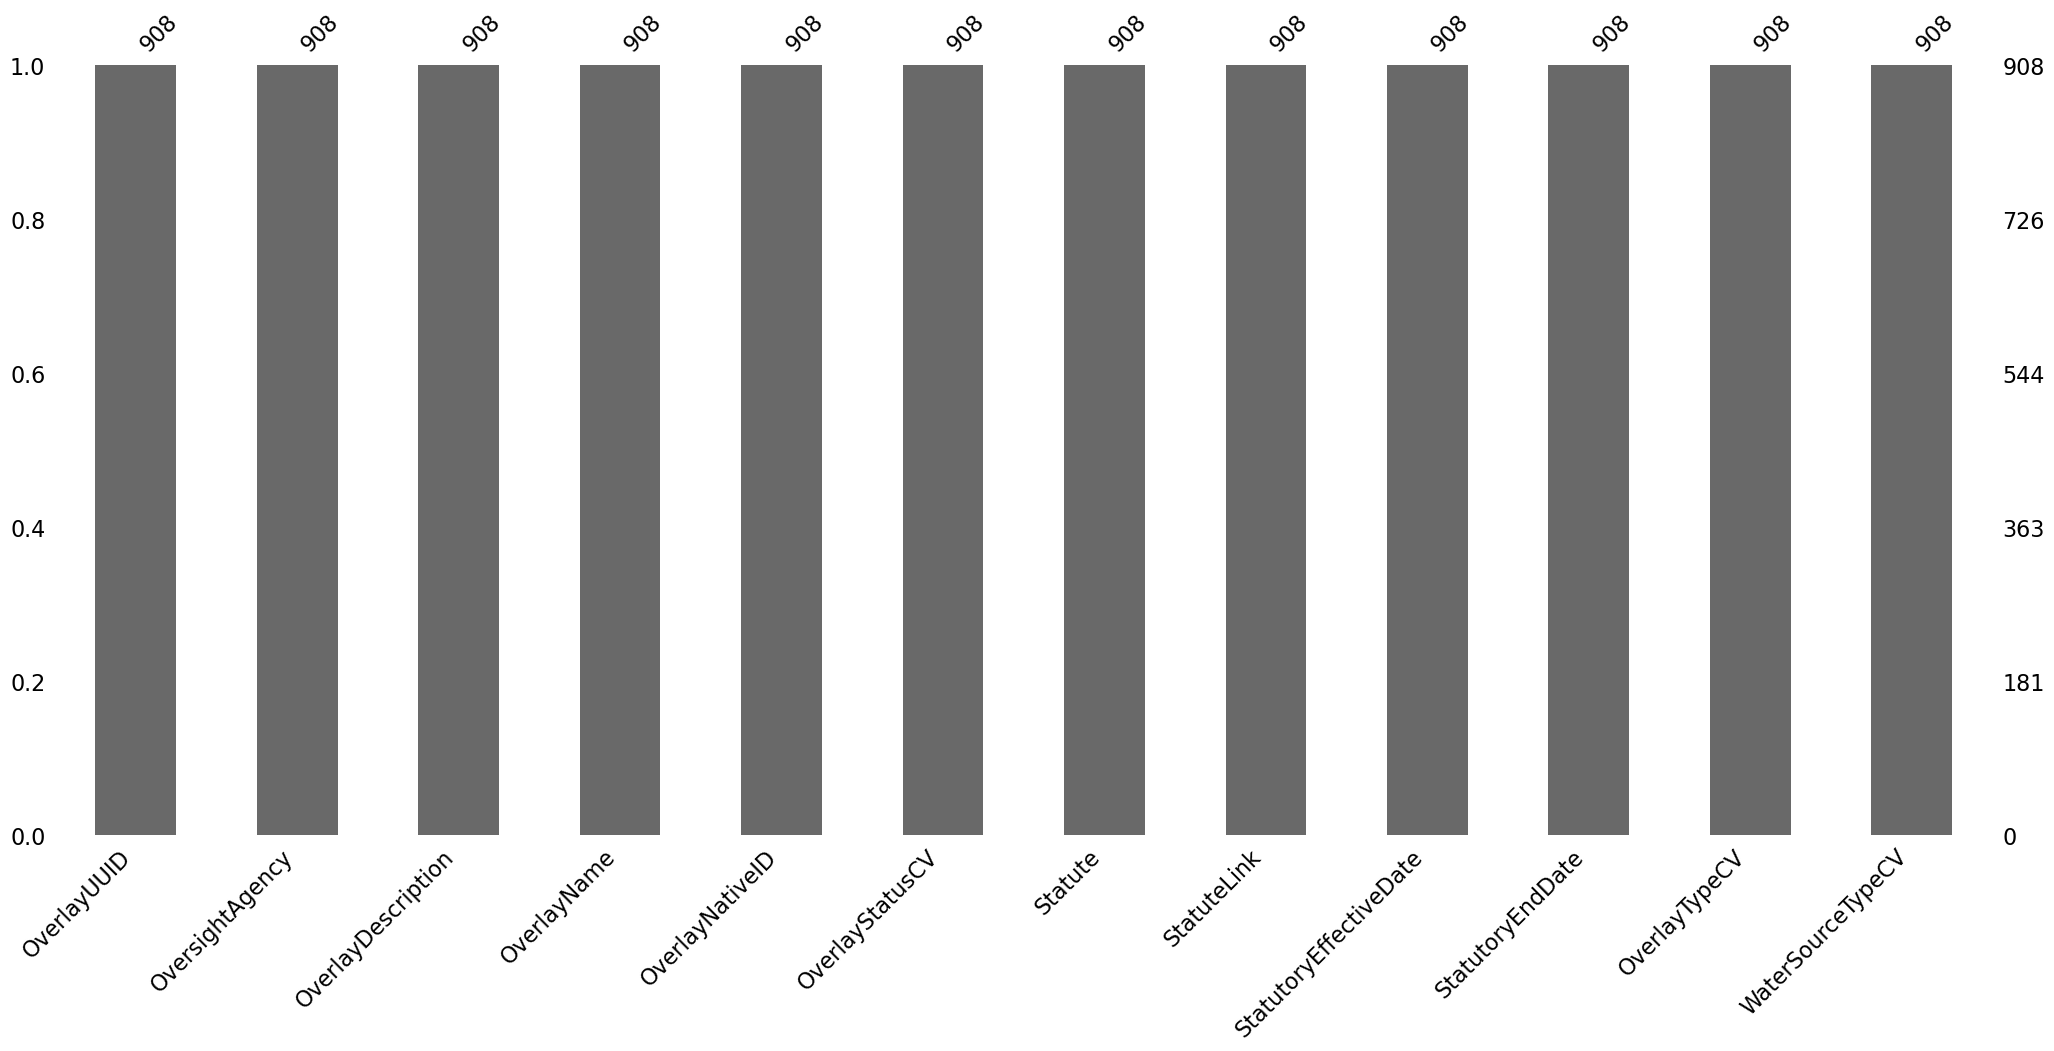

In [12]:
# Check what columns contain missing information.
#msno.matrix(dfov, figsize=(10,5), fontsize=10)
msno.bar(dfov)

In [13]:
# Unique values for 'OversightAgency'
for x in dfov['OversightAgency'].sort_values().unique():
    print(f'"' + x + '",')

"Washington Department of Ecology",
"Washington Department of Natural Resources",


In [14]:
# Unique values for 'OverlayName'
for x in dfov['OverlayName'].sort_values().unique():
    print(f'"' + x + '",')

"Abernathy",
"Acme",
"Adams",
"Adams Creek",
"Aeneas-Cape Labelle",
"Agency Creek",
"Aladdin",
"Alder",
"Alkali - Squilchuck",
"Alkali Canyon Agricultural Lands",
"Alps",
"Alta Lake",
"Anderson Creek",
"Anderson Island",
"Angry Mtn",
"Antoine Creek",
"Arctic Creek",
"Ashnola River",
"Bacon Creek",
"Bainbridge Island",
"Bangor-Port Gamble",
"Barnaby Creek",
"Bear Creek",
"Bear River",
"Beaver Creek",
"Beaver Creek/Lightning Creek",
"Beckler River",
"Bell Creek",
"Bellingham Bay",
"Benson Creek",
"Berry Creek",
"Big Beaver Creek",
"Big Bend Agricultural Lands",
"Big Creek",
"Big Creek/Grade Creek",
"Big Goose Lake",
"Big Lava Beds",
"Big Quil",
"Big Sheep Creek",
"Birch Bay",
"Bird Creek",
"Black River",
"Blakely Island",
"Blanchard Creek",
"Blewett",
"Blockhouse Creek",
"Blue Creek",
"Blue Lake Creek",
"Bogachiel",
"Boulder Creek",
"Bracken Creek",
"Bremer",
"Bridge Creek",
"Brody",
"Brooks",
"Buck Creek",
"Buffalo Lake",
"Bull Creek",
"Bumping",
"Bunker Creek",
"Burley Mtn",
"Butler Cr

In [15]:
# Unique values for 'OverlayNativeID'
for x in dfov['OverlayNativeID'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"wdnr1",
"wdnr10",
"wdnr100",
"wdnr101",
"wdnr102",
"wdnr103",
"wdnr104",
"wdnr105",
"wdnr106",
"wdnr107",
"wdnr108",
"wdnr109",
"wdnr11",
"wdnr110",
"wdnr111",
"wdnr112",
"wdnr113",
"wdnr114",
"wdnr115",
"wdnr116",
"wdnr117",
"wdnr118",
"wdnr119",
"wdnr12",
"wdnr120",
"wdnr121",
"wdnr122",
"wdnr123",
"wdnr124",
"wdnr125",
"wdnr126",
"wdnr127",
"wdnr128",
"wdnr129",
"wdnr13",
"wdnr130",
"wdnr131",
"wdnr132",
"wdnr133",
"wdnr134",
"wdnr135",
"wdnr136",
"wdnr137",
"wdnr138",
"wdnr139",
"wdnr14",
"wdnr140",
"wdnr141",
"wdnr142",
"wdnr143",
"wdnr144",
"wdnr145",
"wdnr146",
"wdnr147",
"wdnr148",
"wdnr149",
"wdnr15",
"wdnr150",
"wdnr151",
"wdnr152",
"wdnr153",
"wdnr154",
"wdnr155",
"wdnr156",
"wdnr157",
"wdnr158",
"wdnr159",
"wdnr16",
"wdnr160",
"wdnr161",
"wdnr162",
"wdnr163",
"wdnr164",
"wdnr165",
"wdnr166",
"wdnr167",
"wdnr168",
"wdnr169",
"wdnr17",
"wdnr170",
"wdnr171",
"wdnr172",
"wdnr173",
"wdnr174",
"wdnr175",
"wdnr176",
"wdnr177",
"wdnr178",
"wdnr179",
"wdnr18",
"wdnr180",
"wdnr181",

In [16]:
# Unique values for 'OverlayTypeCV'
for x in dfov['OverlayTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Water Resource Inventory Area",
"Watershed Administrative Units",


In [17]:
# Unique values for 'WaterSourceTypeCV'
for x in dfov['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Surface Water",


## Num of Record Summary

In [18]:
print(f"Num of Source Entries (rows): ", len(dfin1))
print(f"Num of Source #2 Entries (rows): ", len(dfin2))

Num of Source Entries (rows):  846
Num of Source #2 Entries (rows):  62


In [19]:
# Num of entries compiled into WaDE
ruString =  len(dfru)
roString =  len(dfov)
print("Dataset  | Num of Identified Reporting Units | Num of Identified Overlays")
print("**Compiled WaDE Data** |", ruString, "|", roString)

Dataset  | Num of Identified Reporting Units | Num of Identified Overlays
**Compiled WaDE Data** | 908 | 908


## Markdown Table Creation

In [20]:
# date.csv
dftmp = dfd.copy().to_markdown()
print(dftmp)

|    | Date      |   Year |
|---:|:----------|-------:|
|  0 | 7/28/2023 |   2023 |
|  1 | 8/1/2023  |   2023 |


In [21]:
# organizations.csv
dftmp = dfo.copy().to_markdown()
print(dftmp)

|    | OrganizationUUID   | OrganizationContactEmail   | OrganizationContactName   | OrganizationName                           | OrganizationPhoneNumber   | OrganizationPurview            | OrganizationWebsite    | State   |
|---:|:-------------------|:---------------------------|:--------------------------|:-------------------------------------------|:--------------------------|:-------------------------------|:-----------------------|:--------|
|  0 | WAov_O1            | Olivia Hughs               | olivia.hughes@dnr.wa.gov  | Washington Department of Natural Resources | (360) 902-1000            | Watershed Analysis             | https://www.dnr.wa.gov | WA      |
|  1 | WAov_O2            | Jimmy Norris               | jimmy.norris@ecy.wa.gov   | Washington Department of Ecology           | 360-407-6872              | Water Resource Inventory Areas | https://ecology.wa.gov | WA      |


In [22]:
# reportingunits.csv
dftmp = dfru.loc[[1]].copy()
dftmp = dftmp.drop(['Geometry'], axis=1).to_markdown()
print(dftmp)

|    | ReportingUnitUUID   |   EPSGCodeCV | ReportingUnitName   | ReportingUnitNativeID   | ReportingUnitProductVersion   | ReportingUnitTypeCV            | ReportingUnitUpdateDate   | StateCV   |
|---:|:--------------------|-------------:|:--------------------|:------------------------|:------------------------------|:-------------------------------|:--------------------------|:----------|
|  1 | WAov_RUwdnr10       |         4326 | Warnick             | wdnr10                  |                               | Watershed Administrative Units | 1/7/2021                  | WA        |


In [23]:
# overlays.csv
dftmp = dfov.loc[[1]].copy().to_markdown()
print(dftmp)

|    | OverlayUUID   | OversightAgency                            | OverlayDescription                                                                                                 | OverlayName   | OverlayNativeID   | OverlayStatusCV   | Statute   | StatuteLink   | StatutoryEffectiveDate   | StatutoryEndDate   | OverlayTypeCV                  | WaterSourceTypeCV   |
|---:|:--------------|:-------------------------------------------|:-------------------------------------------------------------------------------------------------------------------|:--------------|:------------------|:------------------|:----------|:--------------|:-------------------------|:-------------------|:-------------------------------|:--------------------|
|  1 | WAov_ROwdnr18 | Washington Department of Natural Resources | a structured approach to developing a forest practices plan for a WAU based on a biological and physical inventory | Acme          | wdnr18            | Active            |           |    

In [24]:
# overlayreportingunits.csv
dftmp = dfovru.loc[[1]].copy().to_markdown()
print(dftmp)

|    | DataPublicationDate   | OrganizationUUID   | OverlayUUID    | ReportingUnitUUID   |
|---:|:----------------------|:-------------------|:---------------|:--------------------|
|  1 | 2025-12-08            | WAov_O1            | WAov_ROwdnr842 | WAov_RUwdnr842      |


## Why Removed Records Summary

In [25]:
print("---- Reasons why records were removed from reporting unit source info ----")
if len(dfrupurge) != 0:
    print(dfrupurge['ReasonRemoved'].value_counts().astype(str) + " | removed from reportingunits.csv input")
else:
    print("...nothing removed.")

---- Reasons why records were removed from reporting unit source info ----
...nothing removed.


In [26]:
print(" ---- Reasons why records were removed from regula toryoverlays info ---- ")
if len(dfovpurge) != 0:
    print(dfovpurge['ReasonRemoved'].value_counts().astype(str) + " | removed from overlays.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from regula toryoverlays info ---- 
ReasonRemoved
Incomplete or bad entry for OversightAgency    1644388 | removed from overlays.csv input
Name: count, dtype: object


## Figures

ReportingUnitName
Klickitat           2
Cowlitz             2
Hazel               1
Colville            1
Chilliwack          1
                   ..
Duwamish - Green    1
Puyallup - White    1
Methow              1
San Juan            1
Okanogan            1
Name: count, Length: 906, dtype: int64


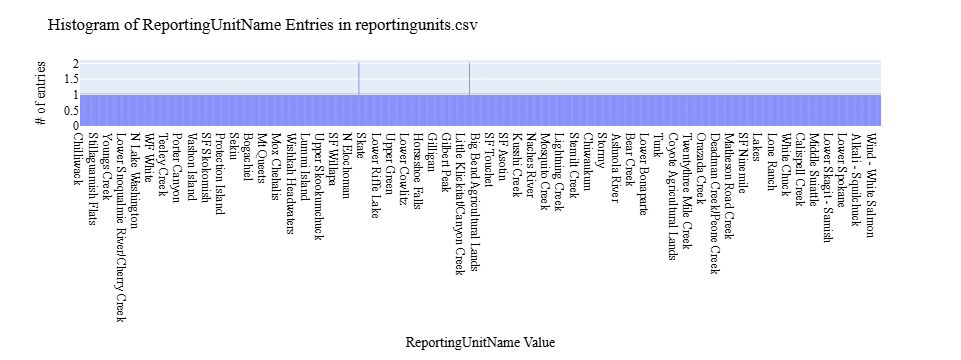

C:\Users\rjame\AppData\Local\Temp\ipykernel_15372\1598321788.py:15: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




In [27]:
# ReportingUnitName: histogram distribution of WaDE values
print(dfru.ReportingUnitName.value_counts())

fig = px.histogram(dfru, x="ReportingUnitName", text_auto=True)
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitName Entries in reportingunits.csv",
                  xaxis_title="ReportingUnitName Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/ReportingUnitName.png', engine="kaleido")

ReportingUnitTypeCV
Watershed Administrative Units    846
Water Resource Inventory Areas     62
Name: count, dtype: int64


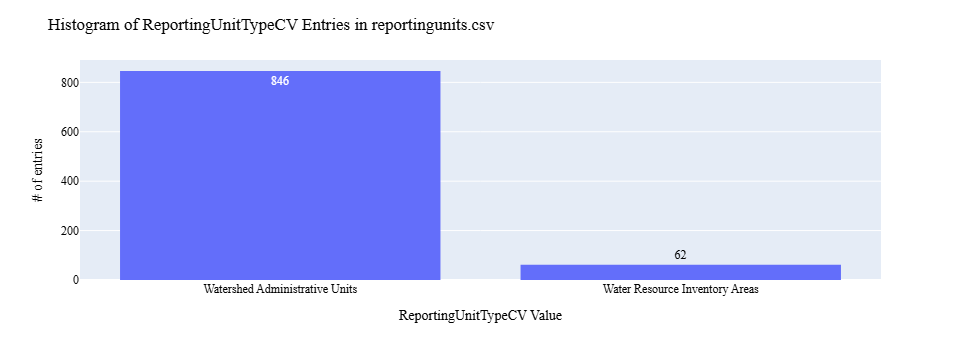

C:\Users\rjame\AppData\Local\Temp\ipykernel_15372\62325110.py:15: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




In [28]:
# ReportingUnitTypeCV: histogram distribution of WaDE values
print(dfru.ReportingUnitTypeCV.value_counts())

fig = px.histogram(dfru, x="ReportingUnitTypeCV", text_auto=True)
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitTypeCV Entries in reportingunits.csv",
                  xaxis_title="ReportingUnitTypeCV Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/ReportingUnitTypeCV.png', engine="kaleido")

In [29]:
# OversightAgency: histogram distribution of WaDE values
print(dfov.OversightAgency.value_counts())

fig = px.histogram(dfov, x="OversightAgency", text_auto=True)
fig.update_layout(bargap=0.2,
                  title="Histogram of OversightAgency Entries in overlays.csv",
                  xaxis_title="OversightAgency Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/OversightAgency.png', engine="kaleido")

OversightAgency
Washington Department of Natural Resources    846
Washington Department of Ecology               62
Name: count, dtype: int64


C:\Users\rjame\AppData\Local\Temp\ipykernel_15372\1330303937.py:15: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




OverlayName
Cowlitz                                2
Klickitat                              2
Alps                                   1
Youngs Creek                           1
Abernathy                              1
                                      ..
Yakima/Satus Agricultural Lands        1
Yakima/Toppenish Agricultural Lands    1
Yelm Creek                             1
Young Cove                             1
Wind - White Salmon                    1
Name: count, Length: 906, dtype: int64


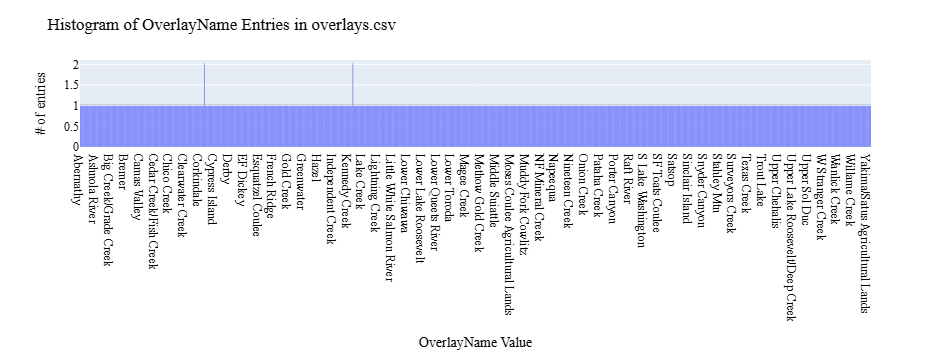

C:\Users\rjame\AppData\Local\Temp\ipykernel_15372\2837595749.py:15: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




In [30]:
# OverlayName: histogram distribution of WaDE values
print(dfov.OverlayName.value_counts())

fig = px.histogram(dfov, x="OverlayName", text_auto=True)
fig.update_layout(bargap=0.2,
                  title="Histogram of OverlayName Entries in overlays.csv",
                  xaxis_title="OverlayName Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/OverlayName.png', engine="kaleido")

In [31]:
# OverlayTypeCV: histogram distribution of WaDE values
print(dfov.OverlayTypeCV.value_counts())

fig = px.histogram(dfov, x="OverlayTypeCV", text_auto=True)
fig.update_layout(bargap=0.2,
                  title="Histogram of OverlayTypeCV Entries in overlays.csv",
                  xaxis_title="OverlayTypeCV Value",
                  yaxis_title="# of entries",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/OverlayTypeCV.png', engine="kaleido")

OverlayTypeCV
Watershed Administrative Units    846
Water Resource Inventory Area      62
Name: count, dtype: int64


C:\Users\rjame\AppData\Local\Temp\ipykernel_15372\1085804864.py:15: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




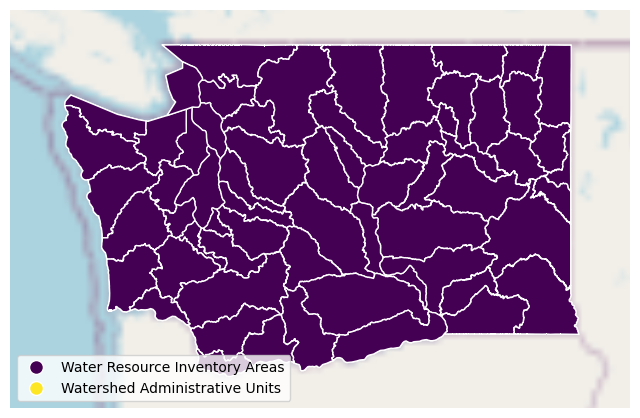

In [32]:
# Map poly info

dfruPoly = dfru.copy()
dfruPoly = dfruPoly[dfruPoly['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfruPoly['Geometry'] = gpd.GeoSeries.from_wkt(dfruPoly['Geometry'], crs="EPSG:4326")
    gdfruPoly = gpd.GeoDataFrame(dfruPoly, geometry=dfruPoly['Geometry'], crs="EPSG:4326") # covert to geodataframe
    #gdfruPoly['Geometry'] = gdfruPoly.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.
    gplt.choropleth(gdfruPoly, edgecolor='white', linewidth=1, hue='ReportingUnitTypeCV', legend=True, legend_kwargs={'loc': 'lower left'}, ax=ax)
    mplt.savefig(format="png", fname='figures/ReportingUnitMap.png') 
except:
    print('No geometry data to plot')

# Custom Queries and Analysis for this Dataset

In [33]:
# asdf